In [1]:
import numpy as np
import pandas as pd

import pandas_datareader as pdr
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns


/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [129]:
sns.set_style('darkgrid')

In [80]:
from collections import defaultdict

In [50]:
start = datetime(2019, 12, 1)
end = datetime.today()

In [51]:
def get_stocks(name):
    stock = pdr.get_data_yahoo(symbols=name, start=start, end=end)
    return stock


#df = get_stocks('VAS.AX')
#print(df['Adj Close'])

In [8]:
df.xs(key='Adj Close', axis = 1).max()

90.81999969482422

In [13]:
# get a list of stocks
ticker_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
stocks_df = ticker_df[0]
#tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [17]:
tickers = [tick for tick in stocks_df['Symbol']]

In [18]:
stocks_df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,NaN
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,NaN
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,NaN


In [133]:
# Different sectors
sectors = set(stocks_df['GICS Sector'])
sectors

{'Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities'}

In [52]:
stock_dict = {}

for tick in tickers:
    try:
        stock_dict[tick] = get_stocks(tick)
    except:
        print('Exception occured for -  ', tick)

Exception occured for -   BRK.B
Exception occured for -   BF.B
Exception occured for -   RTX
Exception occured for -   STX
Exception occured for -   VIAC


In [53]:
len(stock_dict.keys())

500

In [54]:
returns = pd.DataFrame()

for key in stock_dict.keys():
    returns[key + ' Return'] = stock_dict[key]['Adj Close'].pct_change()

In [55]:
returns.head()

,MMM Return,ABT Return,ABBV Return,ABMD Return,ACN Return,ATVI Return,ADBE Return,AMD Return,AAP Return,AES Return,...,WYNN Return,XEL Return,XRX Return,XLNX Return,XYL Return,YUM Return,ZBRA Return,ZBH Return,ZION Return,ZTS Return
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-03,-0.018423,-0.001775,-0.012410,-0.005567,-0.004209,0.006638,0.003832,0.004389,-0.025168,-0.004228,...,-0.023369,0.004248,-0.006493,-0.017946,-0.013194,-0.011038,-0.001238,-0.007338,-0.018788,0.005170
2019-12-04,0.011927,0.009720,0.014543,0.014334,0.004176,-0.013006,-0.004607,0.020308,-0.001835,0.003185,...,0.018353,0.008949,0.002614,0.017146,-0.002118,-0.002514,0.012395,0.034658,0.011118,-0.006554
2019-12-05,-0.016573,0.000704,-0.005505,-0.024859,0.001353,0.020601,0.001719,-0.001764,-0.000263,-0.004762,...,-0.003958,0.002096,-0.013820,0.005545,-0.006235,-0.006855,-0.006279,-0.005055,0.003869,0.003090
2019-12-06,0.043195,0.002816,0.002998,0.000793,0.013510,0.004001,0.010560,0.000252,0.015300,-0.004785,...,0.028832,-0.002253,-0.001322,0.013125,0.005473,0.002538,0.021064,0.006165,0.008316,0.013404


In [91]:
# Worst Drop 

drop = defaultdict()

for date in returns.idxmin():
    if str(date).split()[0] in drop.keys():
        drop[str(date).split()[0]] += 1
    else:
        drop[str(date).split()[0]] = 1
        
drop

defaultdict(None,
            {'2020-03-12': 82,
             '2020-03-16': 245,
             '2020-01-13': 1,
             '2020-03-18': 50,
             '2020-03-09': 47,
             '2020-03-20': 27,
             '2020-04-01': 4,
             '2020-03-27': 4,
             '2020-03-23': 14,
             '2020-02-06': 1,
             '2020-03-19': 4,
             '2020-03-25': 2,
             '2020-04-02': 1,
             '2020-01-03': 1,
             '2020-03-02': 2,
             '2019-12-16': 1,
             '2020-03-11': 2,
             '2020-03-13': 1,
             'NaT': 7,
             '2020-02-27': 1,
             '2020-02-07': 1,
             '2020-02-11': 1,
             '2020-01-29': 1})

In [72]:
# checking volatility
pd.DataFrame(returns.std(), columns = ['returns']).sort_values(by = 'returns', ascending=False).head(10)

,returns
ARNC Return,0.135322
APA Return,0.102115
NCLH Return,0.095164
IR Return,0.088940
NBL Return,0.088233
CCL Return,0.086712
DXC Return,0.080454
OXY Return,0.080380
OKE Return,0.080324
RCL Return,0.079565


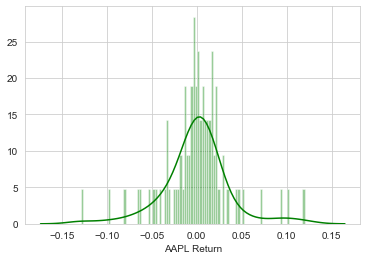

In [74]:
sns.distplot(returns['AAPL Return'],color='green',bins=100)

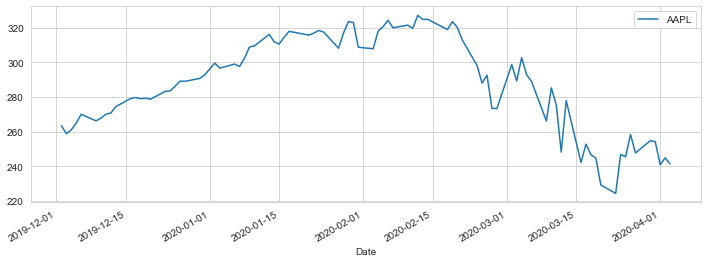

In [75]:
tick = 'AAPL'
stock_dict[tick]['Adj Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [113]:
# stocks at the biggest discount

discount_dict = {}

def calculate_discount(df):
    max_price = df['Adj Close'].describe()['75%']
    min_price = df['Adj Close'].min()
    return (max_price - min_price)/max_price
    

for tick in stock_dict.keys():
#     discount_dict[tick] = (stock_dict[tick]['Adj Close'].max() - stock_dict[tick]['Adj Close'].min())/stock_dict[tick]['Adj Close'].max()
    discount_dict[tick] = calculate_discount(stock_dict[tick])

In [114]:
sorted([(val, key) for key, val in discount_dict.items()], reverse = True)[:15]

[(0.8655787787031876, 'NBL'),
 (0.8627996287856488, 'NCLH'),
 (0.8573329803725857, 'APA'),
 (0.853671185377224, 'IR'),
 (0.832595869689459, 'CCL'),
 (0.8245826730096102, 'RCL'),
 (0.8208436063391492, 'FANG'),
 (0.805380793622138, 'HAL'),
 (0.8021341917774678, 'ARNC'),
 (0.7982426780919094, 'CPRI'),
 (0.7952500400438898, 'OKE'),
 (0.7936596033208089, 'ADS'),
 (0.7816358654155009, 'MGM'),
 (0.7779280667757088, 'DVN'),
 (0.7628589996444297, 'OXY')]

In [110]:
stock_dict[tick]['Adj Close'].describe()

count     86.000000
mean     129.727842
std       11.804019
min       92.660004
25%      121.808899
50%      133.163788
75%      138.339996
max      144.940002
Name: Adj Close, dtype: float64

## Sector wise analysis

In [134]:
# Different sectors
sectors = set(stocks_df['GICS Sector'])
sectors

{'Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities'}

In [158]:

def get_sector(stock):
    return [x for x in stocks_df[stocks_df['Symbol'] == stock]['GICS Sector']]

In [259]:
get_sector('AAPL')

['Information Technology']

In [204]:
stock_info_df = pd.DataFrame.from_dict(discount_dict, orient='index').reset_index()

In [205]:
stock_info_df.columns = ['ticker', 'discount']

In [206]:
stock_info_df['sector'] = [get_sector(tick)[0] for tick in stock_info_df['ticker']]

In [253]:
# add name of the ticker too
def get_stockname(ticker):
    return [x for x in stocks_df[stocks_df['Symbol'] == ticker]['Security']][0]

In [207]:
stock_info_df.head()

,ticker,discount,sector
0,MMM,0.323374,Industrials
1,ABT,0.284225,Health Care
2,ABBV,0.272398,Health Care
3,ABMD,0.281451,Health Care
4,ACN,0.314691,Information Technology


In [208]:
stock_info_df.groupby('sector').describe()

discount                                          \
                          count      mean       std       min       25%   
sector                                                                    
Communication Services     25.0  0.338450  0.123801  0.126598  0.270260   
Consumer Discretionary     64.0  0.518328  0.162822  0.136462  0.423563   
Consumer Staples           32.0  0.281665  0.147042  0.094592  0.165836   
Energy                     27.0  0.637648  0.186506  0.000000  0.576900   
Financials                 65.0  0.454769  0.115669  0.167214  0.374355   
Health Care                60.0  0.295647  0.114030  0.000000  0.247241   
Industrials                70.0  0.405077  0.166098  0.000000  0.323813   
Information Technology     70.0  0.349053  0.115640  0.158055  0.283968   
Materials                  28.0  0.427327  0.121696  0.163819  0.313165   
Real Estate                31.0  0.417288  0.146502  0.165085  0.304250   
Utilities                  28.0  0.353041  0.077923  0.251944  0.290424   

                                                      
                             50%       75%       max  
sector                                                
Communication Services  0.354318  0.441594  0.590036  
Consumer Discretionary  0.515172  0.604365  0.862800  
Consumer Staples        0.261306  0.347439  0.670074  
Energy                  0.640827  0.762397  0.865579  
Financials              0.448481  0.541181  0.711897  
Health Care             0.294552  0.377602  0.537478  
Industrials             0.413903  0.473447  0.853671  
Information Technology  0.319966  0.392924  0.793660  
Materials               0.439456  0.513224  0.661336  
Real Estate             0.443803  0.515908  0.709119  
Utilities               0.331379  0.397531  0.542895

In [211]:
mean_list = []
std_list = []

for tick in stock_info_df['ticker']:
    mean_list.append(returns[tick + ' Return'].mean())
    std_list.append(returns[tick + ' Return'].std())

In [212]:
returns.describe()

,MMM Return,ABT Return,ABBV Return,ABMD Return,ACN Return,ATVI Return,ADBE Return,AMD Return,AAP Return,AES Return,...,WYNN Return,XEL Return,XRX Return,XLNX Return,XYL Return,YUM Return,ZBRA Return,ZBH Return,ZION Return,ZTS Return
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,-0.002095,-0.000136,-0.001421,-0.003053,-0.002582,0.001663,0.000392,0.002115,-0.006376,-0.003934,...,-0.008392,0.000093,-0.008290,-0.000876,-0.002041,-0.004679,-0.003242,-0.004538,-0.007575,0.000032
std,0.031584,0.033123,0.029236,0.033161,0.033866,0.031113,0.039082,0.044585,0.039220,0.046080,...,0.062758,0.034590,0.046301,0.035717,0.038192,0.038399,0.038975,0.037909,0.031199,0.032969
min,-0.092774,-0.097857,-0.130022,-0.110864,-0.083899,-0.106369,-0.147452,-0.146390,-0.162195,-0.173010,...,-0.244346,-0.126918,-0.188008,-0.106987,-0.114964,-0.109992,-0.155724,-0.113277,-0.120465,-0.146956
25%,-0.013229,-0.011418,-0.012748,-0.012819,-0.012047,-0.013006,-0.008375,-0.016337,-0.016926,-0.006986,...,-0.024630,-0.004355,-0.014741,-0.017769,-0.015464,-0.013185,-0.013836,-0.012186,-0.020420,-0.007805
50%,-0.000509,0.000126,-0.000223,-0.002661,-0.000332,-0.000682,0.001719,0.007052,-0.004978,0.000976,...,-0.003659,0.002244,-0.001359,-0.002815,0.000635,0.000127,-0.001858,-0.001930,-0.002175,0.001654
75%,0.011612,0.008227,0.010752,0.015522,0.008907,0.013404,0.012624,0.025782,0.010481,0.009970,...,0.018353,0.008686,0.008049,0.015059,0.012715,0.007714,0.014485,0.008307,0.007673,0.012628
max,0.125986,0.109360,0.087174,0.085613,0.128573,0.091734,0.177193,0.125353,0.100382,0.149582,...,0.156158,0.112577,0.092616,0.114421,0.112620,0.232484,0.139372,0.155798,0.065942,0.119793


In [213]:
# stock_info_df['mean_returns'] = mean_list
stock_info_df['risk'] = std_list
stock_info_df.head()

,ticker,discount,sector,risk
0,MMM,0.323374,Industrials,0.031584
1,ABT,0.284225,Health Care,0.033123
2,ABBV,0.272398,Health Care,0.029236
3,ABMD,0.281451,Health Care,0.033161
4,ACN,0.314691,Information Technology,0.033866


In [214]:
current_price = [stock_dict[tick]['Adj Close'].iloc[-1] for tick in stock_info_df['ticker']]
stock_info_df['current_price'] = current_price
stock_info_df.head()

,ticker,discount,sector,risk,current_price
0,MMM,0.323374,Industrials,0.031584,133.789993
1,ABT,0.284225,Health Care,0.033123,79.449997
2,ABBV,0.272398,Health Care,0.029236,73.370003
3,ABMD,0.281451,Health Care,0.033161,141.399994
4,ACN,0.314691,Information Technology,0.033866,152.149994


In [220]:
stock_info_df.groupby('sector').describe()['risk']

,count,mean,std,min,25%,50%,75%,max
sector,,,,,,,,
Communication Services,25.0,0.035507,0.007482,0.021959,0.031113,0.033456,0.037026,0.057944
Consumer Discretionary,64.0,0.047886,0.014824,0.020374,0.038554,0.045662,0.054313,0.095164
Consumer Staples,32.0,0.033710,0.009607,0.025298,0.027786,0.031251,0.035705,0.073506
Energy,26.0,0.064163,0.014728,0.036984,0.054779,0.061093,0.073378,0.102115
Financials,65.0,0.045851,0.008974,0.030929,0.039918,0.043437,0.051487,0.074967
Health Care,57.0,0.034263,0.006352,0.018610,0.031071,0.033011,0.037741,0.048786
Industrials,67.0,0.043086,0.016612,0.022143,0.034796,0.038230,0.044056,0.135322
Information Technology,70.0,0.040477,0.008569,0.024204,0.036174,0.039115,0.043984,0.080454
Materials,28.0,0.042677,0.007445,0.031973,0.037621,0.041503,0.046182,0.063180


In [221]:
stock_info_df.groupby('sector').describe()['current_price']

,count,mean,std,min,25%,50%,75%,max
sector,,,,,,,,
Communication Services,25.0,158.280798,300.759306,8.18,18.980000,33.950001,102.830002,1097.880005
Consumer Discretionary,64.0,156.468906,408.090927,4.24,14.542500,48.549999,79.020000,2362.939941
Consumer Staples,32.0,81.468438,58.734960,4.60,40.937499,55.465000,120.757502,288.649994
Energy,27.0,25.055926,19.896129,3.65,10.125000,17.350000,36.365000,75.110001
Financials,65.0,78.168615,81.813556,6.83,27.209999,52.160000,91.669998,418.070007
Health Care,60.0,146.967833,118.162588,13.74,72.804996,108.014999,192.627506,630.580017
Industrials,70.0,92.889714,73.288533,6.73,35.532498,78.165001,127.007498,350.500000
Information Technology,70.0,105.578286,70.212549,9.30,48.830000,92.105000,149.220005,293.609985
Materials,28.0,77.741429,83.704338,6.32,27.420000,49.925001,94.932501,420.029999


In [231]:
def top5_sector(sector, metric, asc = False):
    cols = ['ticker', 'discount', 'risk', 'current_price']
    return stock_info_df[stock_info_df['sector'] == sector][cols].sort_values(by = metric, ascending = asc).head(5)

In [241]:
top5_sector('Communication Services', 'risk', True)

,ticker,discount,risk,current_price
468,VZ,0.170752,0.021959,54.700001
166,EA,0.204720,0.029603,102.830002
100,CHTR,0.271765,0.029949,433.799988
25,GOOG,0.270260,0.029962,1097.880005
34,T,0.303590,0.030154,27.459999


In [245]:
top5_sector('Health Care', 'discount', False)

,ticker,discount,risk,current_price
224,HCA,0.537478,0.047432,81.830002
18,ALGN,0.500163,0.048786,154.199997
260,IQV,0.469739,0.042594,102.720001
497,ZBH,0.462485,0.037909,92.010002
233,HOLX,0.447589,0.035124,32.820000


In [246]:
top5_sector('Health Care', 'risk', True)

,ticker,discount,risk,current_price
20,AGN,0.141935,0.018610,175.710007
97,CERN,0.260311,0.023197,62.270000
77,BMY,0.287031,0.023922,55.529999
314,MRK,0.250023,0.026727,76.250000
370,PKI,0.312415,0.027667,71.199997


In [256]:
top5_sector('Health Care', 'risk', True)['ticker'].apply(get_stockname)

20            Allergan, plc
97                   Cerner
77     Bristol-Myers Squibb
314             Merck & Co.
370             PerkinElmer
Name: ticker, dtype: object

In [260]:
stock_info_df.head()

,ticker,discount,sector,risk,current_price
0,MMM,0.323374,Industrials,0.031584,133.789993
1,ABT,0.284225,Health Care,0.033123,79.449997
2,ABBV,0.272398,Health Care,0.029236,73.370003
3,ABMD,0.281451,Health Care,0.033161,141.399994
4,ACN,0.314691,Information Technology,0.033866,152.149994


## Visualizations

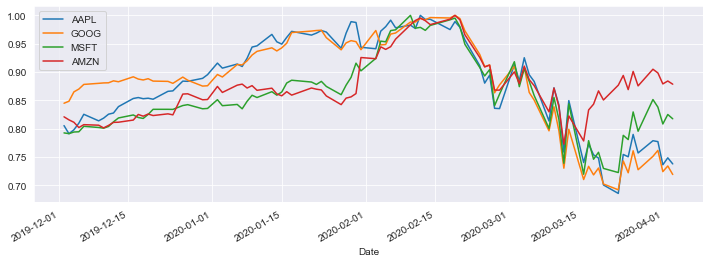

In [130]:
tech_stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

for tick in tech_stocks:
    (stock_dict[tick]['Adj Close']/max(stock_dict[tick]['Adj Close'])).plot(figsize=(12,4),label=tick)
plt.legend()

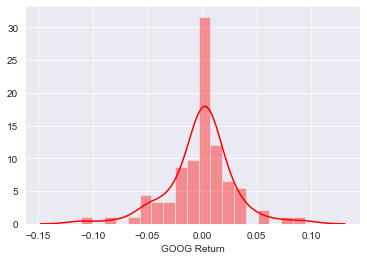

In [242]:
sns.distplot(returns['GOOG Return'],color='red')

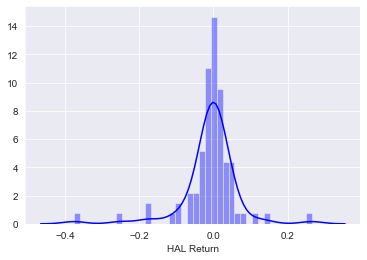

In [243]:
sns.distplot(returns['HAL Return'],color='blue')